# Top Earners in Movie Industry

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="#intro"></a>
## Introduction

> This analysis project is to be done using the imdb movie data. When the analysis is completed, you should be able to find the top 5 highest grossing directors, the top 5 highest grossing movie genres of all time, comparing the revenue of the highest grossing movies and which companies released the most movies. 

> There are 10 columns that will not be needed for the analysis. Use pandas to drop these columns. HINT: Only the columns pertaining to revenue will be needed.

> To get you started, I've already placed the needed code for getting the packages and datafile that you will be using for the project. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./imdb-movies - imdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


### Drop columns without neccesary information and remove all records with no financial information -- Pay close attention to things that don't tell you anything regarding financial data

In [3]:
df.drop(['overview', 'vote_count', 'homepage', 'popularity', 'id', 'imdb_id', 'cast', 'tagline', 'runtime', 'vote_average'], axis=1, inplace=True)

In [4]:
df.head()

,budget,revenue,original_title,director,keywords,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.3,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.3,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.5,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.1,1.385749e+09


### Data Cleaning

In [5]:
# Delete all records with null, or empty values
df.dropna(inplace=True)
df.isnull().sum()

budget                  0
revenue                 0
original_title          0
director                0
keywords                0
genres                  0
production_companies    0
release_date            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Here's a helpful hint from my own analysis when I ran this the first time. This may help shed light on what your data set should look like.

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

In [26]:
df.to_csv('imdb-movies_clean.csv', index=False)
df.head()

,budget,revenue,original_title,director,keywords,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.3,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.3,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.5,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.1,1.385749e+09


In [7]:
df_no_genre = df.copy()
df_no_genre.drop(['genres'], axis=1, inplace=True)
df_no_genre['production_companies'] = df_no_genre['production_companies'].str.split("|")
df_all_studios = df_no_genre.explode('production_companies')
df_all_studios.head()

,budget,revenue,original_title,director,keywords,production_companies,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Universal Studios,6/9/15,2015,137999939.3,1.392446e+09
0,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Amblin Entertainment,6/9/15,2015,137999939.3,1.392446e+09
0,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Legendary Pictures,6/9/15,2015,137999939.3,1.392446e+09
0,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Fuji Television Network,6/9/15,2015,137999939.3,1.392446e+09
0,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Dentsu,6/9/15,2015,137999939.3,1.392446e+09


In [8]:
df_no_production = df.copy()
df_no_production.drop(['production_companies'], axis=1, inplace=True)
df_no_production.head()

,budget,revenue,original_title,director,keywords,genres,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,137999939.3,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,137999939.3,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,3/18/15,2015,101199955.5,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,183999919.0,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,4/1/15,2015,174799923.1,1.385749e+09


<a id="eda"></a>
## Exploratory Data Analysis

> Use Matplotlib to display your data analysis

### Which production companies released the most movies in the last 10 years? Display the top 5 production companies.

In [9]:
top_production = df_all_studios[(df_all_studios['release_year'] > 2012)].groupby(['production_companies'])['original_title'].count().reset_index().sort_values(by=['original_title'], ascending=False).head()
top_production

,production_companies,original_title
2009,Warner Bros.,37
1942,Universal Pictures,35
1360,Paramount Pictures,27
270,Blumhouse Productions,24
417,Columbia Pictures,23


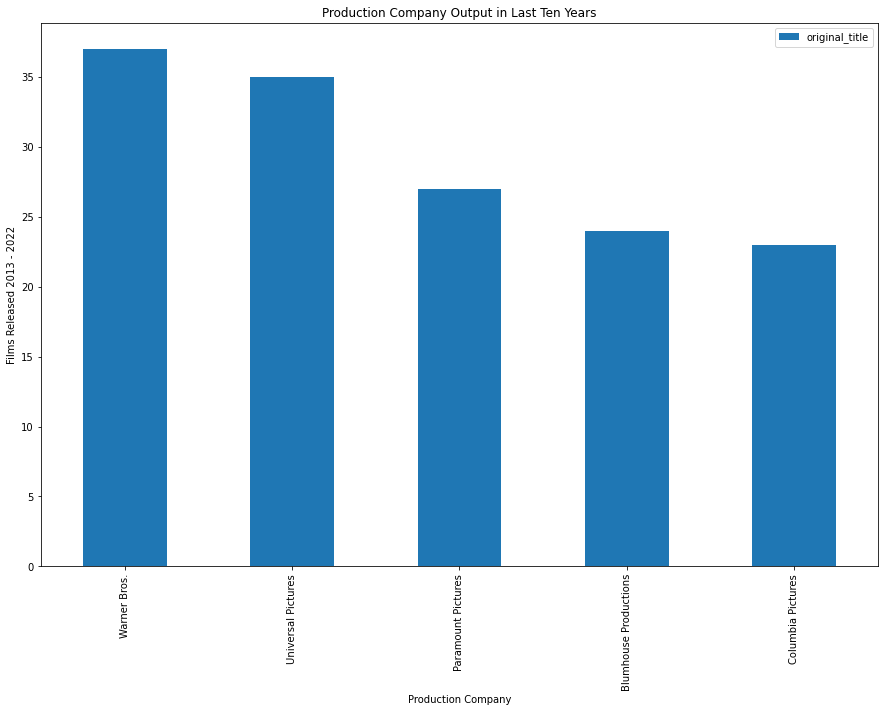

In [10]:
top_production.plot(kind='bar', x='production_companies', y='original_title', figsize=(15, 10))
plt.title('Production Company Output in Last Ten Years')
plt.xlabel('Production Company')
plt.ylabel('Films Released 2013 - 2022');

### What 5 movie genres grossed the highest all-time?

In [11]:
top_genres = df_no_production.groupby(['genres'])['revenue'].sum().reset_index().sort_values(by=['revenue'], ascending=False).head()
top_genres

,genres,revenue
618,Comedy,19779865016
878,Drama,14914250081
757,Comedy|Romance,11331029666
467,Adventure|Fantasy|Action,7597483556
691,Comedy|Drama|Romance,6827739420


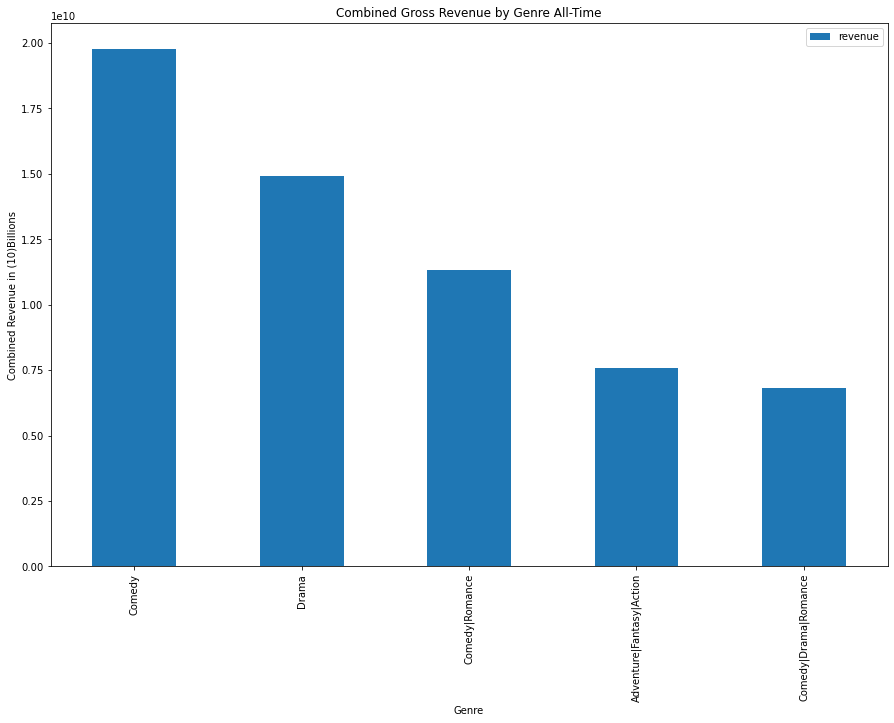

In [25]:
top_genres.plot(kind='bar', x='genres', y='revenue', figsize=(15, 10))
plt.title('Combined Gross Revenue by Genre All-Time')
plt.xlabel('Genre')
plt.ylabel('Combined Revenue in (10)Billions');

### Who are the top 5 grossing directors?

In [16]:
directors = df_no_genre.groupby(['director'])['revenue'].sum().reset_index().sort_values(by=['revenue'], ascending=False).head()
directors

,director,revenue
3600,Steven Spielberg,9018563772
2956,Peter Jackson,6523244659
1551,James Cameron,5841894863
2559,Michael Bay,4917208171
646,Christopher Nolan,4167548502


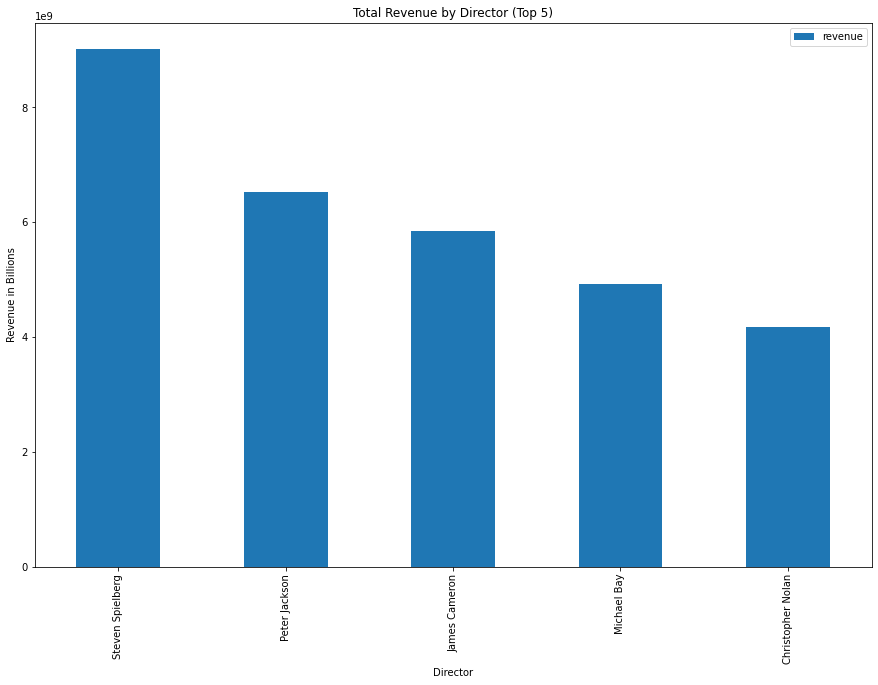

In [18]:
directors.plot(kind='bar', x='director', y='revenue', figsize=(15, 10))
plt.title('Total Revenue by Director (Top 5)')
plt.xlabel('Director')
plt.ylabel('Revenue in Billions');

### Compare the revenue of the highest grossing movies of all time.

In [19]:
highest_gross = df.sort_values(by=['revenue'], ascending=False).head(10)
highest_gross

,budget,revenue,original_title,director,keywords,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
1386,237000000,2781505847,Avatar,James Cameron,culture clash|future|space war|space colony|so...,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,2009,240886902.9,2.827124e+09
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09
5231,200000000,1845034188,Titanic,James Cameron,shipwreck|iceberg|ship|panic|titanic,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,1997,271692064.2,2.506406e+09
4361,220000000,1519557910,The Avengers,Joss Whedon,new york|shield|marvel comic|comic|superhero,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,2012,208943741.9,1.443191e+09
0,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.3,1.392446e+09
4,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.1,1.385749e+09
14,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,marvel comic|comic|sequel|superhero|vision,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,2015,257599886.7,1.292632e+09
3374,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,self sacrifice|magic|frog|sorcerer|school,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,2011,121174755.3,1.287184e+09
5422,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,queen|musical|princess|betrayal|snowman,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,2013,140405002.9,1.192711e+09
5425,200000000,1215439994,Iron Man 3,Shane Black,terrorist|war on terror|tennessee|malibu|marve...,Action|Adventure|Science Fiction,Marvel Studios,4/18/13,2013,187206670.5,1.137692e+09


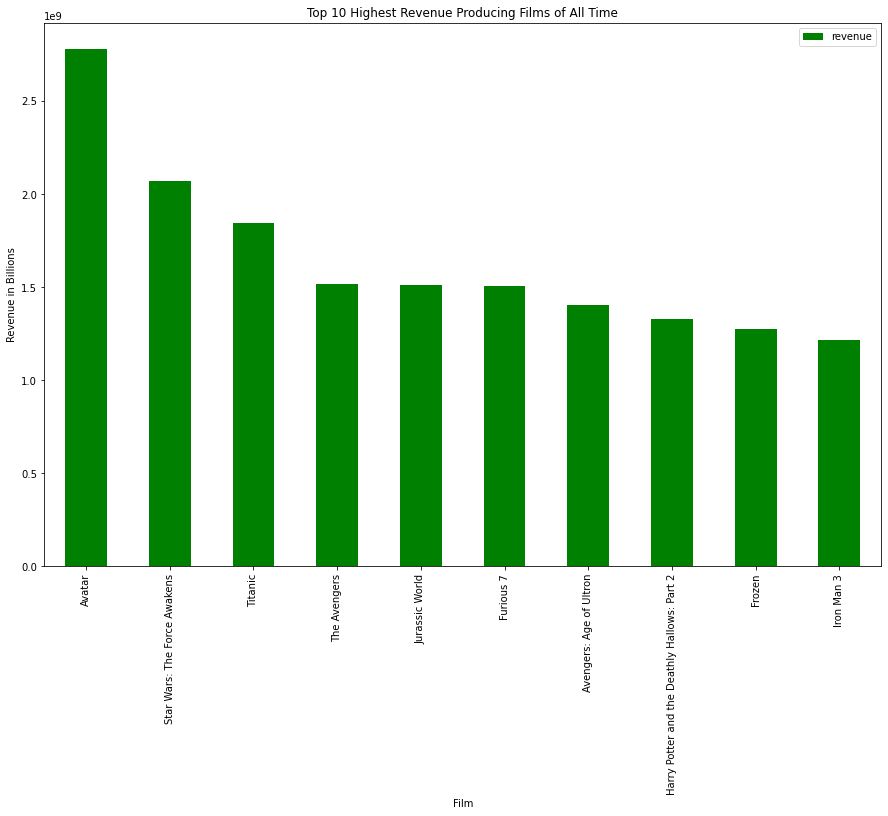

In [24]:
highest_gross.plot(kind='bar', x='original_title', y='revenue', figsize=(15, 10), color="green")
plt.title('Top 10 Highest Revenue Producing Films of All Time')
plt.xlabel('Film')
plt.ylabel('Revenue in Billions');

<a id="conclusions"></a>
## Conclusions

> Using the cell below, write a brief conclusion of what you have found from the anaylsis of the data. The Cell below will allow you to write plan text instead of code.

Nothing too unexpected, except that comedies have generated the most revenue all-time. Given that no comedies are in the top 10 all-time individually grossing films, it is likely the case that a) comedies were much more popular in the past, b) the classification system leaves something to be desired, or c) there have simply been more comedies created over time. Confirmed below - only 78 films classified as "Action|Thriller," but 525 as "Comedy."

In [34]:
top_genres = df_no_production.groupby(['genres'])['original_title'].count().reset_index().sort_values(by=['original_title'], ascending=False).head(15)
top_genres

,genres,original_title
878,Drama,566
618,Comedy,525
1066,Drama|Romance,248
659,Comedy|Drama,233
757,Comedy|Romance,223
1365,Horror|Thriller,212
1305,Horror,189
691,Comedy|Drama|Romance,185
860,Documentary,168
1093,Drama|Thriller,111
